In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import ifft, fft, fftfreq
%matplotlib inline

In [10]:
# Importo el archivo directamente desde la url.
file_1 = np.genfromtxt('https://raw.githubusercontent.com/ComputoCienciasUniandes/MetodosComputacionalesDatos/master/hands_on/solar/monthrg.dat')
year_1 = file_1[:,0] 
month_1 = file_1[:,1]
day_1 = file_1[:,2]
mean_1 = file_1[:,3]

# Nos importan solo los que tengan días distintos de cero.
year = []
month = []
mean = []
for i in range(len(day_1)):
    if(day_1[i]!=0):
        year.append(year_1[i])
        month.append(month_1[i])
        mean.append(mean_1[i])

# Queremos tener el año como decimal, así que incluyo el decimal del mes correspondiente en cada uno de los datos.
year = [year[i] + month[i]/12. for i in range(len(year))]

In [11]:
# Cálculo de la transformada de Fourier
mean_fou = fft(mean)
# Se define el array de frecuencias que tiene en cuenta que el espaciamiento es años, de tal forma que se obtienen
# frequencias con unidades ciclos/año.
frequency = fftfreq(len(year), 1./12.)

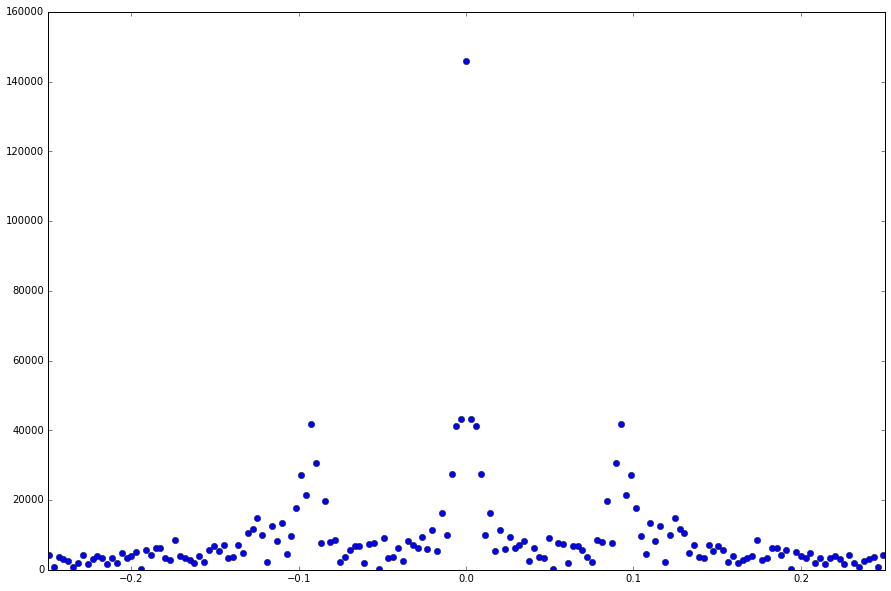

In [12]:
# Gráfica de los datos de la transformada
plt.figure(figsize=(15,10))
plt.plot(frequency,np.abs(mean_fou),'o')
# Se observó que la información relevante estaba alrededor de cero, así que nos limitamos 
# a un intervalo pequeño alrededor de cero.
plt.xlim(-0.25,0.25)
plt.show()

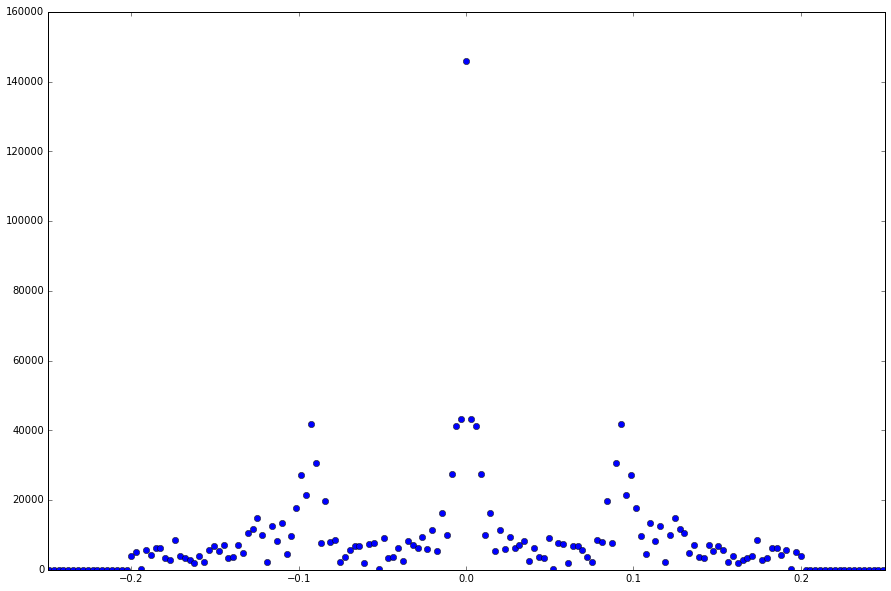

In [13]:
# Filtrado de las frecuencias
mean_fou[np.abs(frequency) >= 0.2 ] = 0.

# Gráfica de la información para ver el cambio con el filtrado.
plt.figure(figsize=(15,10))
plt.plot(frequency,np.abs(mean_fou),'o')
plt.xlim(-0.25,0.25)
plt.show()

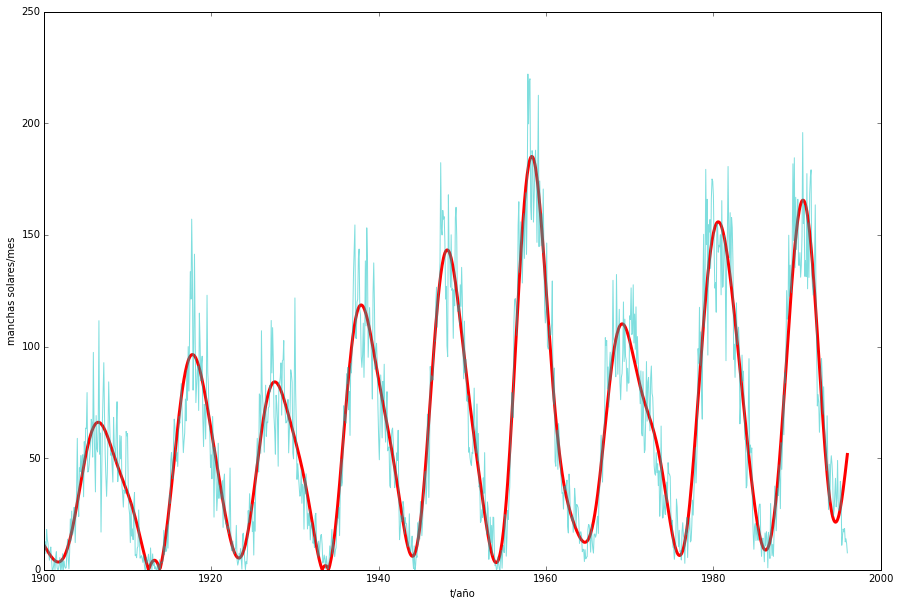

In [14]:
# Transformada inversa de los datos.
filter_mean = ifft(mean_fou)

# Gráifica de los datos iniciales y de los datos filtrados en el intervalo de interés.
plt.figure(figsize=(15,10))
plt.plot(year[2988:],np.abs(filter_mean[2988:]),'r',linewidth=3.)
plt.plot(year[2988:],mean[2988:],'c',alpha=0.5)
plt.xlabel(u't/año')
plt.ylabel(u'manchas solares/mes')
plt.show()

In [15]:
fcut = 0.05
wanted_frequency = frequency[frequency>=fcut]
wanted_mean = np.abs(mean_fou[frequency>=fcut])
max_index = np.argmax(wanted_mean)
print "El período del ciclo solar es: " + str(1/wanted_frequency[max_index]) + " años."

El período del ciclo solar es: 10.7838541667 años.
